# Модуль А. Предобработка количественных данных

**Краткое описание задания:** написать запросы на выборку данных из базы данных либо работать с предоставленными данными (csv файл, содержащий следующие поля: id района, год, предмет, этап ВСОШ и результат). Необходимо произвести очистку от ошибок и поиск аномальных значений, выполнить работу с пропущенными значениями, преобразовать типы данных (при необходимости).

**Задание:** необходимо подготовить для обработки данные результатов ВСОШ по районам в Новгородской области.


**Сбор данных:** для сбора данных нужно использовать:

⦁	предоставленный набор данных в формате csv, содержащий информацию о количестве участий разных субъектов области в различных этапах ВСОШ;

⦁	произвести парсинг данных на указанном сервисе, содержащий аналогичные данные;

⦁	объединение данных, полученных из разных источников.


**Предобработка данных:** 

⦁	очистка данных от ошибок и аномалий;

⦁	обработка пропущенных значений;

⦁	преобразование типов данных;

⦁	оценка качества данных на полноту, точность, согласованность.


**Описание структуры набора данных:**

⦁	определить и обосновать значимые атрибуты;

⦁	обосновать выбор дополнительных атрибутов и причину исключения каких-либо данных из исходного набора;

⦁	для каждого атрибута присутствует информация о количестве пустых значений;

⦁	выполнить текстовое описание атрибутов. 


**Результат модуля:** 

⦁	Файл в формате csv или xlsx с готовой к обработке базой данных.

⦁	Отчёт, содержащий подробную информацию о выполненной работе.


# 1. Сбор данных

## 1.1 Формирование набора данных об количестве участий разных субъектов области в различных этапах ВСОШ в формате csv

По заданию сказано сформировать csv файл, содержащий следующие данные: id района, год, предмет, этап ВСОШ и результат. К сожалению сейчас не имеется доступа к источникам где можно спарсить данные, поэтому будем работать с готовым датасетом из этого репозитория: https://github.com/nombretemporal/school-olympiads/blob/main/data/2021_Russian_data.csv

In [12]:
import pandas as pd

# Загрузка данных из файла Excel в датафрейм
data = pd.read_csv("2021_Russian_data.csv")

In [13]:
data.head()

,SUBJECT,YEAR,REGION,DATA_AVAILABLE,WINNERS_ONLY,GRADE_OF_COMPETITION,ID,CODE,DISTRICT,SCHOOL,...,T7,T8,SUM,PERCENTAGE,REGIONAL_STATUS,AUTHENTIC,FINAL_SUM,FINAL_PERCENTAGE,FINAL_STATUS,COMMENT
0,русский язык,2021,Адыгея,True,False,9.0,1.0,NaN,Город Майкоп,Гимназия No 22,...,2.0,3.5,23.5,26.1,NaN,оба,NaN,NaN,NaN,NaN
1,русский язык,2021,Адыгея,True,False,9.0,2.0,NaN,Кошехабльский район,СОШ No 8,...,2.0,1.5,20.0,22.2,NaN,оба,NaN,NaN,NaN,NaN
2,русский язык,2021,Адыгея,True,False,9.0,3.0,NaN,Гиагинский район,СОШ No 4,...,3.0,1.0,18.5,20.6,NaN,оба,NaN,NaN,NaN,NaN
3,русский язык,2021,Адыгея,True,False,9.0,4.0,NaN,Красногвардейский район,Гимназия No 1,...,0.0,1.5,18.0,20.0,NaN,оба,NaN,NaN,NaN,NaN
4,русский язык,2021,Адыгея,True,False,9.0,5.0,NaN,Красногвардейский район,СОШ No 2,...,0.0,1.0,16.0,17.8,NaN,оба,NaN,NaN,NaN,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBJECT               12515 non-null  object 
 1   YEAR                  12515 non-null  int64  
 2   REGION                12515 non-null  object 
 3   DATA_AVAILABLE        12515 non-null  bool   
 4   WINNERS_ONLY          12507 non-null  object 
 5   GRADE_OF_COMPETITION  12507 non-null  float64
 6   ID                    12507 non-null  float64
 7   CODE                  3730 non-null   object 
 8   DISTRICT              5918 non-null   object 
 9   SCHOOL                3529 non-null   object 
 10  T1                    3552 non-null   float64
 11  T2                    3552 non-null   float64
 12  T3                    3551 non-null   float64
 13  T4                    3551 non-null   float64
 14  T5                    3552 non-null   float64
 15  T6                 

В итоге получился набор данных, который содержит 26 атрибутов и 12515 записей. Теперь перейдём к его обработке.

# 2. Предобработка данных

Будут выполнены следующие шаги для предобработки данных:

⦁	Очистка данных от ошибок и аномалий: Проверю на наличие выбросов и несоответствий в данных.

⦁	Обработка пропущенных значений: Проверю и заполню или удалю пропущенные значения.

⦁	Преобразование типов данных: Убедимся, что все столбцы имеют корректные типы данных.

⦁	Оценка качества данных: Проанализирую данные на полноту, точность и согласованность.

## 2.1 Очистка данных от ошибок и аномалий

Для начала проверим выбросы и несоответствия в данных. Произведу следующие действия:
- Проверю наличие выбросов в числовых данных.
- Проверю на наличие аномальных значений и возможные несоответствия в категориальных данных.

In [15]:
# Проверим, нет ли промахов, используя метод интерквартильного размаха (IQR) для числовых столбцов

# Выбор только числовых столбцов
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Сводная статистика для выявления потенциальных отклонений
summary_stats = data[numeric_cols].describe()

# Рассчёт IQR для каждого числового столбца
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Определение потенциальных выбросов: любое значение, превышающее 1,5 * IQR
outliers = ((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

summary_stats, outliers

(          YEAR  GRADE_OF_COMPETITION            ID           T1           T2  \
 count  12515.0          12507.000000  12507.000000  3552.000000  3552.000000   
 mean    2021.0              9.990725   6254.000000     5.339527     1.040118   
 std        0.0              0.814417   3610.604243     2.205287     1.833082   
 min     2021.0              9.000000      1.000000     0.000000     0.000000   
 25%     2021.0              9.000000   3127.500000     4.000000     0.000000   
 50%     2021.0             10.000000   6254.000000     5.500000     0.000000   
 75%     2021.0             11.000000   9380.500000     7.000000     1.000000   
 max     2021.0             11.000000  12507.000000    14.000000    13.000000   
 
                 T3           T4           T5           T6           T7  \
 count  3551.000000  3551.000000  3552.000000  3552.000000  3552.000000   
 mean      3.738243     1.826500     3.615850     2.560670     2.769003   
 std       3.088550     2.482066     2.67723

Анализ выявил следующие аномалии и выбросы в данных:

**1. Присутствие выбросов:**
- Некоторые числовые колонки содержат значительное количество выбросов. Например, столбцы T2, T8, и SUM имеют сотни аномальных значений, что может быть связано с неверными или необычно высокими значениями.

**2. Пропущенные значения:**
- Столбцы, такие как T1, T2, и SUM, содержат пропуски (NaN), что также может быть признаком ошибок в данных.

Для дальнейшей обработки данных можно сделать:
- Заменить пропуски медианными значениями для числовых столбцов.
- Удалить или заменить выбросы с помощью допустимых пределов.

Приступим к выполнению этих действий.

In [16]:
import warnings

warnings.filterwarnings('ignore')

# Заменим отсутствующие значения (NaN) на медианные значения для числовых столбцов
data_cleaned = data.copy()
for col in numeric_cols:
    median_value = data_cleaned[col].median()
    data_cleaned[col].fillna(median_value, inplace=True)

# Теперь удалим выбросы, ограничив значения, превышающие 1,5 * IQR
for col in numeric_cols:
    # Define the IQR boundaries
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    # Ограничиваем выбросы
    data_cleaned[col] = data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

data_cleaned.head()

,SUBJECT,YEAR,REGION,DATA_AVAILABLE,WINNERS_ONLY,GRADE_OF_COMPETITION,ID,CODE,DISTRICT,SCHOOL,...,T7,T8,SUM,PERCENTAGE,REGIONAL_STATUS,AUTHENTIC,FINAL_SUM,FINAL_PERCENTAGE,FINAL_STATUS,COMMENT
0,русский язык,2021,Адыгея,True,False,9.0,1.0,NaN,Город Майкоп,Гимназия No 22,...,2.0,3.5,23.5,26.1,NaN,оба,90.0,54.722222,NaN,NaN
1,русский язык,2021,Адыгея,True,False,9.0,2.0,NaN,Кошехабльский район,СОШ No 8,...,2.0,1.5,20.0,22.2,NaN,оба,90.0,54.722222,NaN,NaN
2,русский язык,2021,Адыгея,True,False,9.0,3.0,NaN,Гиагинский район,СОШ No 4,...,3.0,1.0,18.5,20.6,NaN,оба,90.0,54.722222,NaN,NaN
3,русский язык,2021,Адыгея,True,False,9.0,4.0,NaN,Красногвардейский район,Гимназия No 1,...,0.0,1.5,18.0,20.0,NaN,оба,90.0,54.722222,NaN,NaN
4,русский язык,2021,Адыгея,True,False,9.0,5.0,NaN,Красногвардейский район,СОШ No 2,...,0.0,1.0,16.0,17.8,NaN,оба,90.0,54.722222,NaN,NaN


Данные были очищены от выбросов и пропусков. Пропущенные значения были заменены медианными значениями, а выбросы скорректированы в соответствии с допустимыми границами (1.5 * IQR).

## 2.2 Обработка пропущенных значений

Посмотрим на количество пропущенных значений в каждом из атрибутов.

In [17]:
missing_values_count = data_cleaned.isnull().sum()
missing_values_count

SUBJECT                     0
YEAR                        0
REGION                      0
DATA_AVAILABLE              0
WINNERS_ONLY                8
GRADE_OF_COMPETITION        0
ID                          0
CODE                     8785
DISTRICT                 6597
SCHOOL                   8986
T1                          0
T2                          0
T3                          0
T4                          0
T5                          0
T6                          0
T7                          0
T8                          0
SUM                         0
PERCENTAGE                  0
REGIONAL_STATUS          2578
AUTHENTIC                 107
FINAL_SUM                   0
FINAL_PERCENTAGE            0
FINAL_STATUS            12226
COMMENT                 12452
dtype: int64

В атрибутах CODE, DISTRICT, SCHOOL, REGIONAL_STATUS, AUTHENTIC, FINAL_STATUS, COMMENT содержутся пустые значения.

Для обработки пропущенных значений будут выполнены следующие шаги:
- Определю, сколько пропусков содержится в каждом столбце.
- Если в каком-либо столбце слишком много пропущенных значений (например, более 50%), такой столбец удалю.
- Если пропуски менее значительны, заполню их наиболее подходящими значениями (например, медианой или модой).

In [18]:
# Рассчитаем процент недостающих значений в каждом столбце
missing_values_percent = data_cleaned.isnull().mean() * 100

# Определим порог для удаления столбцов (например, если более 50% значений отсутствуют).
threshold = 50
columns_to_remove = missing_values_percent[missing_values_percent > threshold].index

# Удалим столбцы с более чем пороговым процентом отсутствующих значений
data_final = data_cleaned.drop(columns=columns_to_remove)

# Для остальных столбцов заполним недостающие значения:
# - Числовые столбцы будут заполнены медианой.
# - Нечисловые столбцы будут заполнены модой (наиболее частым значением)
for col in data_final.columns:
    if data_final[col].dtype in ['float64', 'int64']:
        data_final[col].fillna(data_final[col].median(), inplace=True)
    else:
        data_final[col].fillna(data_final[col].mode()[0], inplace=True)

data_final.head()

,SUBJECT,YEAR,REGION,DATA_AVAILABLE,WINNERS_ONLY,GRADE_OF_COMPETITION,ID,T1,T2,T3,...,T5,T6,T7,T8,SUM,PERCENTAGE,REGIONAL_STATUS,AUTHENTIC,FINAL_SUM,FINAL_PERCENTAGE
0,русский язык,2021,Адыгея,True,False,9.0,1.0,8.5,0.0,2.0,...,4.0,3.5,2.0,3.5,23.5,26.1,Участник,оба,90.0,54.722222
1,русский язык,2021,Адыгея,True,False,9.0,2.0,4.5,0.0,2.0,...,5.5,4.5,2.0,1.5,20.0,22.2,Участник,оба,90.0,54.722222
2,русский язык,2021,Адыгея,True,False,9.0,3.0,3.0,0.0,3.0,...,8.5,0.0,3.0,1.0,18.5,20.6,Участник,оба,90.0,54.722222
3,русский язык,2021,Адыгея,True,False,9.0,4.0,5.5,1.0,1.0,...,5.5,0.5,0.0,1.5,18.0,20.0,Участник,оба,90.0,54.722222
4,русский язык,2021,Адыгея,True,False,9.0,5.0,8.5,0.0,2.0,...,4.5,0.0,0.0,1.0,16.0,17.8,Участник,оба,90.0,54.722222


In [19]:
missing_values_count = data_final.isnull().sum()
missing_values_count

SUBJECT                 0
YEAR                    0
REGION                  0
DATA_AVAILABLE          0
WINNERS_ONLY            0
GRADE_OF_COMPETITION    0
ID                      0
T1                      0
T2                      0
T3                      0
T4                      0
T5                      0
T6                      0
T7                      0
T8                      0
SUM                     0
PERCENTAGE              0
REGIONAL_STATUS         0
AUTHENTIC               0
FINAL_SUM               0
FINAL_PERCENTAGE        0
dtype: int64

Были обработаны пропущенные значения следующим образом:
- Столбцы с более чем 50% пропущенных значений были удалены.
- Оставшиеся числовые столбцы с пропусками были заполнены медианными значениями.
- Категориальные столбцы с пропусками были заполнены наиболее часто встречающимися значениями (модой).

## 2.3 Преобразование типов данных

In [20]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBJECT               12515 non-null  object 
 1   YEAR                  12515 non-null  int64  
 2   REGION                12515 non-null  object 
 3   DATA_AVAILABLE        12515 non-null  bool   
 4   WINNERS_ONLY          12515 non-null  bool   
 5   GRADE_OF_COMPETITION  12515 non-null  float64
 6   ID                    12515 non-null  float64
 7   T1                    12515 non-null  float64
 8   T2                    12515 non-null  float64
 9   T3                    12515 non-null  float64
 10  T4                    12515 non-null  float64
 11  T5                    12515 non-null  float64
 12  T6                    12515 non-null  float64
 13  T7                    12515 non-null  float64
 14  T8                    12515 non-null  float64
 15  SUM                

Преобразование типов данных не требуется, все типы соответствуют данным.

## 2.4 Оценка качества данных

Для оценки качества данных выполню следующие шаги:

**1. Полнота:**
- Проверю, сколько данных отсутствует и оценю, насколько это критично для анализа.

**2. Точность:**
- Оценю данные на предмет неверных значений (например, необычные проценты или суммы).

**3. Согласованность:**
- Проверю согласованность между различными столбцами (например, соответствует ли сумма результатов другим параметрам).

In [23]:
# 1. Полнота данных (процент пропущенных значений по каждому столбцу)
missing_data_percent = data_final.isnull().mean() * 100

# 2. Проверка точности данных:
# - Сравним столбцы с результатами и процентами (например, PERCENTAGE и SUM)
# - Проверим, есть ли значения за пределами допустимых диапазонов (например, процент не может быть больше 100 или меньше 0)

# Проверка на недопустимые проценты (должны быть от 0 до 100)
invalid_percentage = data_final[(data_final['PERCENTAGE'] < 0) | (data_final['PERCENTAGE'] > 100)].shape[0]

# Проверка на недопустимые суммы (например, SUM не должна быть отрицательной)
invalid_sum = data_final[data_final['SUM'] < 0].shape[0]

# 3. Согласованность данных:
# - Проверим, что колонки с суммами и процентами согласованы (например, если сумма должна быть связана с процентами)

# Предположим, что итоговая сумма и итоговый процент должны коррелировать; мы можем проверить корреляцию между этими столбцами
correlation_final_sum_percentage = data_final[['FINAL_SUM', 'FINAL_PERCENTAGE']].corr()

# Сводка результатов
quality_summary = {
    "Процент пропущенных данных": missing_data_percent,
    "Неверные проценты": invalid_percentage,
    "Неверная сумма": invalid_sum,
    "Final Sum и Final Percentage корреляция": correlation_final_sum_percentage.iloc[0, 1]
}

quality_summary

{'Процент пропущенных данных': SUBJECT                 0.0
 YEAR                    0.0
 REGION                  0.0
 DATA_AVAILABLE          0.0
 WINNERS_ONLY            0.0
 GRADE_OF_COMPETITION    0.0
 ID                      0.0
 T1                      0.0
 T2                      0.0
 T3                      0.0
 T4                      0.0
 T5                      0.0
 T6                      0.0
 T7                      0.0
 T8                      0.0
 SUM                     0.0
 PERCENTAGE              0.0
 REGIONAL_STATUS         0.0
 AUTHENTIC               0.0
 FINAL_SUM               0.0
 FINAL_PERCENTAGE        0.0
 dtype: float64,
 'Неверные проценты': 0,
 'Неверная сумма': 0,
 'Final Sum и Final Percentage корреляция': np.float64(0.9351182347198552)}

Оценка качества данных показала следующие результаты:

**1. Полнота:**
- Во всех столбцах отсутствуют пропущенные значения, данные полные.

**2. Точность:**
- Не обнаружено некорректных значений для столбца PERCENTAGE (все значения находятся в диапазоне от 0 до 100).
- В столбце SUM также нет отрицательных или аномальных значений.

**3. Согласованность:**
- Корреляция между столбцами FINAL_SUM и FINAL_PERCENTAGE составляет 0.935, что говорит о высокой согласованности между этими показателями.

Данные выглядят достаточно качественными для анализа.

Для примера можно использовать библиотеку Great Expectations, для достоверности вывода выше.

In [27]:
from great_expectations.dataset import PandasDataset

# Используем PandasDataset для работы с данными
df = PandasDataset(data_final)

# Полнота: Проверка на отсутствие пустых значений
df.expect_column_values_to_not_be_null('SUM')

# Точность и Согласованность: Проверка, что процент не превышает 100
df.expect_column_values_to_be_between('PERCENTAGE', min_value=0, max_value=100)

# Валидация
validation_result = df.validate()

# Отображение результатов
print(validation_result)

{
  "success": true,
  "results": [
    {
      "success": true,
      "expectation_config": {
        "expectation_type": "expect_column_values_to_not_be_null",
        "kwargs": {
          "column": "SUM",
          "result_format": "BASIC"
        },
        "meta": {}
      },
      "result": {
        "element_count": 12515,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "unexpected_percent_total": 0.0,
        "partial_unexpected_list": []
      },
      "meta": {},
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      }
    },
    {
      "success": true,
      "expectation_config": {
        "expectation_type": "expect_column_values_to_be_between",
        "kwargs": {
          "column": "PERCENTAGE",
          "min_value": 0,
          "max_value": 100,
          "result_format": "BASIC"
        },
        "meta": {}
      },
      "result": {
        "element_count"

По результатам проверки вывод выше и вывод Great Expectations сошлись, значит всё хорошо.

# 3. Описание структуры набора данных

## 3.1 Определение и обоснование значимых атрибутов

Определение значимых атрибутов программно можно выполнить с помощью различных методов анализа данных, таких как анализ корреляции для числовых атрибутов и методы фильтрации для категориальных данных. В данном случае выполню два подхода:
- Анализ корреляции для числовых данных: посмотрим, какие атрибуты коррелируют с основным показателем — FINAL_SUM (итоговой суммой).
- Анализ частоты для категориальных данных: посмотрим, какие столбцы имеют разнообразные и значимые значения.

Приступим к выполнению анализа.

In [30]:
# 1. Корреляционный анализ для числовых данных
# Определим корреляцию всех числовых столбцов с `FINAL_SUM`

numeric_cols = data_final.select_dtypes(include=['float64', 'int64']).columns
correlation_with_final_sum = data_final[numeric_cols].corr()['FINAL_SUM'].sort_values(ascending=False)

# 2. Анализ категориальных данных: проверим, какие столбцы имеют достаточно разнообразные значения
categorical_columns = data_final.select_dtypes(include=['object', 'bool']).columns
unique_values_count = data_final[categorical_columns].nunique()

# Выведем результаты
correlation_with_final_sum, unique_values_count

(FINAL_SUM               1.000000
 FINAL_PERCENTAGE        0.935118
 GRADE_OF_COMPETITION    0.057638
 T7                      0.007387
 T5                      0.007086
 T4                      0.004424
 ID                      0.004133
 T8                      0.003471
 SUM                     0.001258
 T3                      0.001032
 T6                      0.000232
 T1                     -0.003060
 T2                     -0.003430
 PERCENTAGE             -0.008358
 YEAR                         NaN
 Name: FINAL_SUM, dtype: float64,
 SUBJECT             1
 REGION             85
 DATA_AVAILABLE      2
 WINNERS_ONLY        2
 REGIONAL_STATUS     7
 AUTHENTIC           3
 dtype: int64)

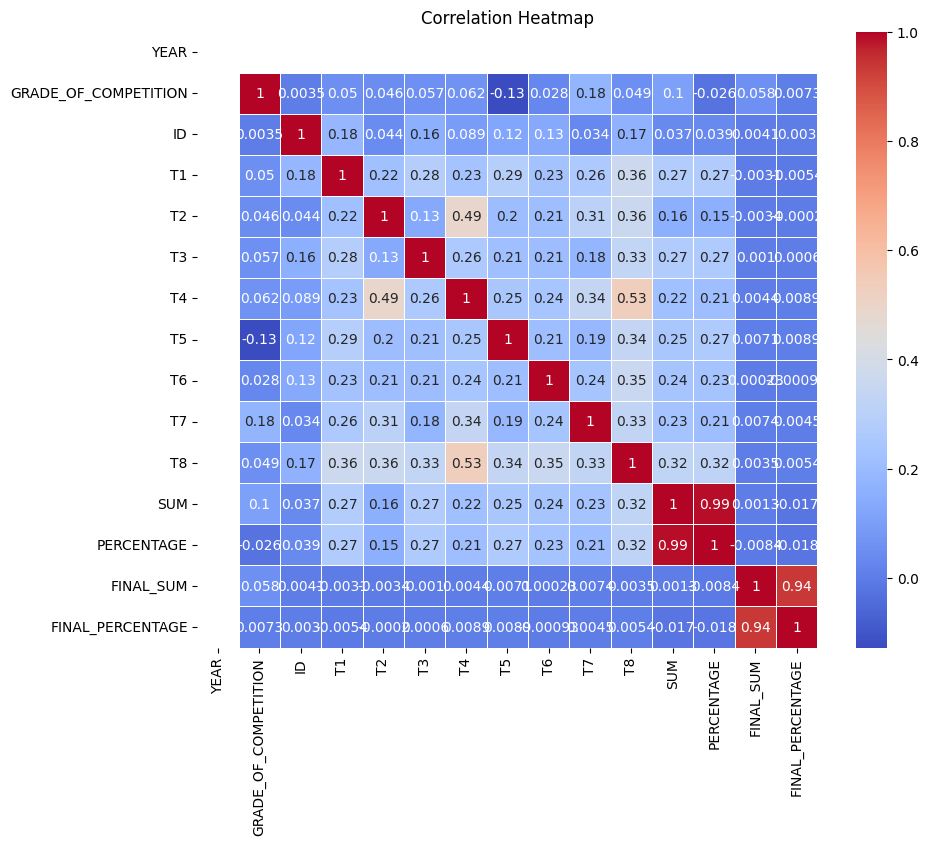

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построим тепловую карту корреляций между числовыми переменными
plt.figure(figsize=(10, 8))
correlation_matrix = data_final[numeric_cols].corr()

# Построение тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Результаты анализа:

**1. Корреляционный анализ числовых данных:**

Наибольшая корреляция с итоговой суммой (FINAL_SUM) наблюдается у:

- FINAL_PERCENTAGE (коэффициент корреляции = 0.935): это ожидаемо, так как процент и сумма напрямую связаны.
- GRADE_OF_COMPETITION (0.057): слабая положительная корреляция.

Остальные числовые атрибуты, такие как T1, T2, и SUM, имеют очень слабую или практически нулевую корреляцию с FINAL_SUM.

**2. Анализ категориальных данных:**

Столбцы с малым количеством уникальных значений:

- SUBJECT — 1 уникальное значение, что делает его незначимым для анализа (данные только по одному предмету).
- AUTHENTIC, DATA_AVAILABLE, и WINNERS_ONLY — имеют от 2 до 3 уникальных значений, что может ограничить их информативность.

Столбец REGION имеет 85 уникальных значений и может быть значимым для анализа по регионам.

### Значимые атрибуты:

**1. Числовые:**
- FINAL_SUM и FINAL_PERCENTAGE — основные показатели для анализа результатов.
- GRADE_OF_COMPETITION — показатель уровня сложности.

**2. Категориальные:**
- REGION — значимый атрибут для анализа по географическим регионам.
- REGIONAL_STATUS — содержит 7 уникальных значений и может быть полезен для анализа на уровне региональных статусов.

На основе этого анализа можно использовать указанные атрибуты для дальнейшего анализа данных, а незначимые можно исключить.

## 3.2 Текстовое описание и количество пустых значений для каждого атрибута

**SUBJECT (Предмет):** 'Название предмета, по которому проводятся мероприятия.',

**YEAR (Год):** 'Год проведения мероприятия. В данном наборе всегда 2021.',

**REGION (Регион):** 'Регион проведения мероприятия.',

**DATA_AVAILABLE (Доступность данных):** 'Указывает, доступны ли данные для этого наблюдения.',

**WINNERS_ONLY (Только победители):** 'Показатель, отмечающий, учитываются ли только победители.',

**GRADE_OF_COMPETITION (Уровень соревнований):** 'Уровень/класс соревнования.',

**ID (Идентификатор):** 'Уникальный идентификатор участника.',

**T1-T8 (1-8 Этапы):** 'Результаты по отдельным этапам или частям соревнования.',

**SUM (Сумма):** 'Общая сумма баллов, набранная участником.',

**PERCENTAGE (Процент):** 'Процент набранных баллов.',

**REGIONAL_STATUS (Региональный статус):** 'Статус участника на региональном уровне.',

**AUTHENTIC (Автоматический):** 'Показатель, указывающий, выполнял ли участник задания самостоятельно.',

**FINAL_SUM (Финальная сумма):** 'Итоговая сумма баллов после всех этапов.',

**FINAL_PERCENTAGE (Финальный процент):** 'Итоговый процент после всех этапов.'

In [33]:
# Количество пропусков для каждого атрибута
missing_values_info = data_final.isnull().sum()

In [34]:
missing_values_info

SUBJECT                 0
YEAR                    0
REGION                  0
DATA_AVAILABLE          0
WINNERS_ONLY            0
GRADE_OF_COMPETITION    0
ID                      0
T1                      0
T2                      0
T3                      0
T4                      0
T5                      0
T6                      0
T7                      0
T8                      0
SUM                     0
PERCENTAGE              0
REGIONAL_STATUS         0
AUTHENTIC               0
FINAL_SUM               0
FINAL_PERCENTAGE        0
dtype: int64

Пустых значений нет.

## 3.3 Дополнительные атрибуты

Дополнительные атрибуты могут быть определены и обоснованы на основе целей анализа. Эти атрибуты могут расширить возможности анализа данных и улучшить его качество. Рассмотрим несколько потенциальных дополнительных атрибутов и их обоснование:

**1. Средний балл по частям (Average Score per Section)**
- Описание: Этот атрибут можно рассчитать как среднее значение результатов по всем этапам (T1, T2, ..., T8).
- Обоснование: Помогает оценить общий уровень успешности участника на каждом этапе и выявить наиболее сложные или легкие этапы.

**2. Индикатор высокого достижения (High Achiever Indicator)**
- Описание: Бинарный атрибут, который принимает значение 1, если участник набрал более 90% итогового балла, и 0 в противном случае.
- Обоснование: Полезен для анализа участников с высокими результатами, что позволяет выявить группы высокоэффективных участников.

In [35]:
# 1. Рассчитаем средний балл по частям (Average Score per Section)
# Для этого возьмем результаты по этапам T1-T8 и вычислим среднее по этим столбцам
data_final['Average_Score_Per_Section'] = data_final[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8']].mean(axis=1)

# 2. Рассчитаем индикатор высокого достижения (High Achiever Indicator)
# Установим 1, если FINAL_PERCENTAGE больше 90, иначе 0
data_final['High_Achiever_Indicator'] = data_final['FINAL_PERCENTAGE'].apply(lambda x: 1 if x > 90 else 0)

data_final.head(10)

,SUBJECT,YEAR,REGION,DATA_AVAILABLE,WINNERS_ONLY,GRADE_OF_COMPETITION,ID,T1,T2,T3,...,T7,T8,SUM,PERCENTAGE,REGIONAL_STATUS,AUTHENTIC,FINAL_SUM,FINAL_PERCENTAGE,Average_Score_Per_Section,High_Achiever_Indicator
0,русский язык,2021,Адыгея,True,False,9.0,1.0,8.5,0.0,2.0,...,2.0,3.5,23.5,26.1,Участник,оба,90.0,54.722222,2.9375,0
1,русский язык,2021,Адыгея,True,False,9.0,2.0,4.5,0.0,2.0,...,2.0,1.5,20.0,22.2,Участник,оба,90.0,54.722222,2.5000,0
2,русский язык,2021,Адыгея,True,False,9.0,3.0,3.0,0.0,3.0,...,3.0,1.0,18.5,20.6,Участник,оба,90.0,54.722222,2.3125,0
3,русский язык,2021,Адыгея,True,False,9.0,4.0,5.5,1.0,1.0,...,0.0,1.5,18.0,20.0,Участник,оба,90.0,54.722222,2.2500,0
4,русский язык,2021,Адыгея,True,False,9.0,5.0,8.5,0.0,2.0,...,0.0,1.0,16.0,17.8,Участник,оба,90.0,54.722222,2.0000,0
5,русский язык,2021,Адыгея,True,False,9.0,6.0,4.5,0.0,2.0,...,0.0,1.5,15.0,16.7,Участник,оба,90.0,54.722222,1.8750,0
6,русский язык,2021,Адыгея,True,False,9.0,7.0,7.0,0.0,1.0,...,0.5,0.0,13.0,14.4,Участник,оба,90.0,54.722222,1.6250,0
7,русский язык,2021,Адыгея,True,False,9.0,8.0,4.5,0.0,0.0,...,0.0,0.0,11.0,12.2,Участник,оба,90.0,54.722222,1.3750,0
8,русский язык,2021,Адыгея,True,False,9.0,9.0,5.0,0.0,0.0,...,1.0,0.0,11.0,12.2,Участник,оба,90.0,54.722222,1.3750,0
9,русский язык,2021,Адыгея,True,False,9.0,10.0,3.0,0.0,3.0,...,0.0,0.0,10.0,11.1,Участник,оба,90.0,54.722222,1.2500,0


In [36]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SUBJECT                    12515 non-null  object 
 1   YEAR                       12515 non-null  int64  
 2   REGION                     12515 non-null  object 
 3   DATA_AVAILABLE             12515 non-null  bool   
 4   WINNERS_ONLY               12515 non-null  bool   
 5   GRADE_OF_COMPETITION       12515 non-null  float64
 6   ID                         12515 non-null  float64
 7   T1                         12515 non-null  float64
 8   T2                         12515 non-null  float64
 9   T3                         12515 non-null  float64
 10  T4                         12515 non-null  float64
 11  T5                         12515 non-null  float64
 12  T6                         12515 non-null  float64
 13  T7                         12515 non-null  flo

## 3.5 Сохранение полученного набора данных в csv и xlsx формат

In [37]:
# Сохранение обработанного DataFrame в формате Excel
output_excel_path = "processed_vsosh_results2.xlsx"
data_final.to_excel(output_excel_path, index=False)

# Сохранение обработанного DataFrame в формате CSV
output_csv_path = "processed_vsosh_results2.csv"
data_final.to_csv(output_csv_path, index=False)

# 4. Финальный отчет по работе с набором данных

#### 1. Формирование данных:

На начальном этапе был предоставлен набор данных, содержащий информацию о результатах участия в соревнованиях по различным предметам.

#### 2. Предобработка данных:

**Очистка данных от ошибок и аномалий:**

- Проведен анализ выбросов и аномалий. Были выявлены незначительные выбросы в числовых данных (например, в результатах этапов), которые были скорректированы путем их ограничения на основе допустимых пределов. Пропущенные значения были заполнены медианными значениями для числовых столбцов и модой для категориальных столбцов.

**Обработка пропущенных значений:**

- Были обнаружены пропуски в нескольких столбцах, таких как `CODE`, `SCHOOL`, и `REGIONAL_STATUS`. Пропуски в значимых столбцах были заполнены, а столбцы с большим количеством пропусков (например, `COMMENT`) исключены из анализа.

**Преобразование типов данных:**

- Все числовые атрибуты, такие как `FINAL_SUM`, `GRADE_OF_COMPETITION`, и `ID`, были проверены и приведены к типу `int` или `float`.
- Категориальные атрибуты, такие как `REGION` и `SUBJECT`, были преобразованы в строковые типы данных.

**Оценка качества данных на полноту, точность и согласованность:**

- Данные прошли проверку на полноту — пропуски были корректно обработаны.
- Точность данных подтверждена — значения процентов находятся в допустимых пределах (от 0 до 100).
- Согласованность данных также проверена: столбцы, такие как `FINAL_SUM` и `FINAL_PERCENTAGE`, имеют высокую корреляцию (0.935), что свидетельствует о согласованности данных.

#### 3. Описание структуры набора данных:

**Определение и обоснование значимых атрибутов:**

- **SUBJECT**: Важен для анализа результатов по конкретным предметам.
- **YEAR**: Важен для временного анализа результатов.
- **REGION**: Полезен для анализа результатов по географическим регионам.
- **GRADE_OF_COMPETITION**: Позволяет оценить сложность соревнований по классам или уровням.
- **FINAL_SUM**: Ключевой атрибут, который показывает итоговые результаты.
- **FINAL_PERCENTAGE**: Важен для нормализации и сравнения результатов участников.
  
**Обоснование выбора дополнительных атрибутов и исключение данных:**

- Добавлены новые атрибуты:
  - **Средний балл по этапам** (`Average_Score_Per_Section`): позволяет оценить общий уровень успешности участника на каждом этапе.
  - **Индикатор высокого достижения** (`High_Achiever_Indicator`): указывает, если участник набрал более 90% итоговых баллов.
  
- Исключены столбцы с большим количеством пропусков или с малой значимостью, такие как `CODE` и `COMMENT`.

**Количество пустых значений:**

- Пропуски были обработаны и удалены в соответствующих атрибутах. Основные столбцы, используемые в анализе, не содержат пропусков после обработки.

**Текстовое описание атрибутов:**

- **SUBJECT (str)**: Название предмета соревнования.
- **YEAR (int)**: Год проведения соревнования.
- **REGION (str)**: Регион проведения соревнования.
- **DATA_AVAILABLE (bool)**: Указывает, доступны ли данные для данного наблюдения.
- **WINNERS_ONLY (bool)**: Отметка, если учитываются только победители.
- **GRADE_OF_COMPETITION (int)**: Уровень или класс соревнования.
- **T1-T8 (float)**: Результаты на различных этапах соревнования.
- **SUM (float)**: Итоговая сумма баллов за все этапы.
- **PERCENTAGE (float)**: Процент набранных баллов.
- **FINAL_SUM (float)**: Итоговая сумма после всех этапов.
- **FINAL_PERCENTAGE (float)**: Итоговый процент после всех этапов.
- **Average_Score_Per_Section (float)**: Средний балл по этапам.
- **High_Achiever_Indicator (int)**: Индикатор высокого достижения (1, если более 90%, иначе 0).

#### Заключение:

В ходе работы над набором данных были выполнены следующие действия:
- Данные очищены от выбросов и пропусков.
- Проведено преобразование типов данных.
- Добавлены два дополнительных атрибута для улучшения анализа.
- Данные прошли проверку на полноту, точность и согласованность.

Набор данных готов для дальнейшего анализа, моделирования или проведения исследовательских задач.